In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

# Caso servicio en DC

In [ ]:
#row = vec.iloc[0]
#delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

In [2]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[(targetDcDelay.name == 'endToEndDelay:vector') & (targetDcDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersDcDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersDcDelay

,avg,stddev,min,max
0,946.403390,1727.114982,532.635394,22805.470381
1,420.195395,644.004126,196.622048,5195.561135
2,599.364081,1610.375129,201.715642,15047.087702
3,463.705261,957.834542,188.616107,8965.914825
4,351.551041,349.222440,213.556492,2231.305946
...,...,...,...,...
95,822.027335,2791.013804,241.739397,31811.638771
96,544.909611,857.983181,239.295396,7359.072852
97,481.339958,778.724886,247.186807,7319.733311
98,361.631749,501.206130,189.972677,4266.220049


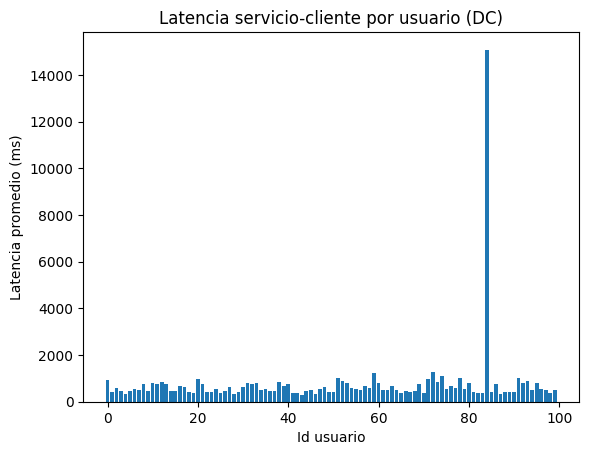

In [3]:
plt.title("Latencia servicio-cliente por usuario (DC)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
#ax.set_xticks(range(0,10))
plt.show()

# Caso servicio en Fog

In [4]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[(targetFogDelay.name == 'endToEndDelay:vector') & (targetFogDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersFogDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersFogDelay

,avg,stddev,min,max
0,443.876543,180.874760,405.303622,1413.357174
1,101.231404,257.828705,45.050811,2091.034001
2,50.070414,1.862179,45.018983,54.327210
3,100.796307,219.867618,45.016732,1051.927876
4,118.106223,337.669928,45.561113,3049.558046
...,...,...,...,...
95,131.193296,144.012836,105.799189,1110.921949
96,131.244481,144.075933,105.018699,1111.621017
97,135.515195,157.551294,105.236766,1112.602293
98,83.768322,181.262193,45.059702,1055.732298


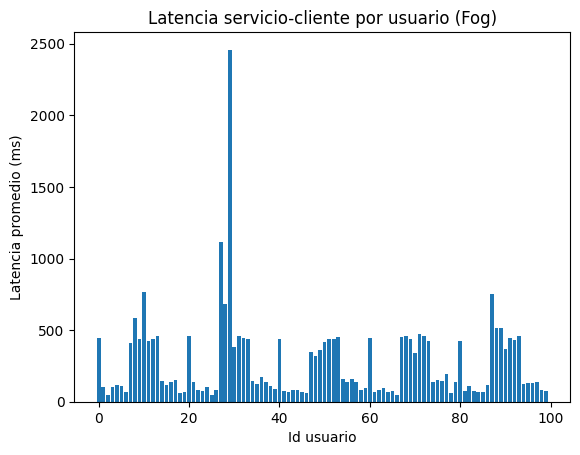

In [8]:
plt.title("Latencia servicio-cliente por usuario (Fog)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersFogDelay.index, usersFogDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
#ax.set_xticks(range(0,10))
plt.show()

# Comparativa Dc vs Fog

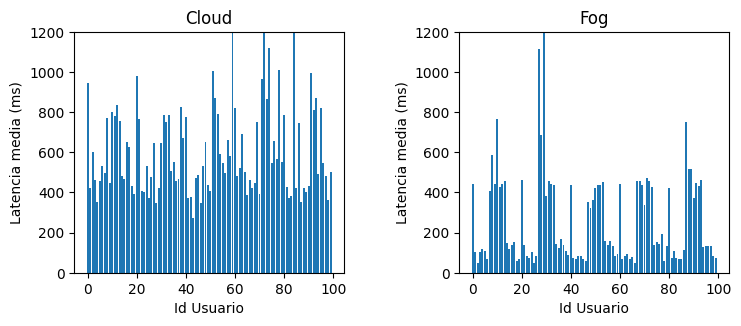

In [8]:
fig, (ax) = plt.subplots(1, 2, figsize=(4,3))
#fig.suptitle('Latencia servicio-cliente por usuario')

fig.tight_layout()
fig.set_size_inches(8, 3)
#plt.ylabel("Latencia promedio (ms)")
#plt.xlabel("Id usuario")
ax[0].set_title("Cloud")
ax[1].set_title("Fog")

ax[0].bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax[1].bar(usersFogDelay.index, usersFogDelay.avg)

for x in ax:
    x.set_ylim(0,1200)
    #x.set_xticks(range(0,10))
    x.set(xlabel='Id Usuario', ylabel='Latencia media (ms)')

fig.savefig("bigDelays.pdf", bbox_inches='tight')

# Estadísticas comparativas

In [11]:
usersDcDelay.describe()

,avg,stddev,min,max
count,100.000000,100.000000,100.000000,100.000000
mean,745.887991,1653.292601,274.769311,13537.686493
std,1463.836512,5128.416498,136.933023,29639.668482
min,273.390059,179.477483,175.462646,1242.191252
25%,431.200527,623.761832,194.822526,4626.103457
50%,533.294473,823.841984,201.764910,7329.448384
75%,772.230505,1316.594238,249.188012,15056.907702
max,15084.367314,51735.640354,553.753813,292549.955614


In [12]:
usersFogDelay.describe()

,avg,stddev,min,max
count,100.000000,100.000000,100.000000,100.000000
mean,272.078217,465.319042,158.601314,3961.756375
std,300.489596,1081.052633,135.233655,8842.306832
min,50.057353,1.862179,45.016732,54.327210
25%,83.866059,157.483222,45.083806,1054.787210
50%,140.147557,202.267501,105.018213,1974.915845
75%,436.715796,343.768883,196.731519,3049.872019
max,2457.952426,9135.895660,405.761984,65918.120127
